In [7]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


In [8]:
# One-hot encode the labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Normalise the image data to 0-1 range
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


### **Task 1, Model 1: Dense Neural Network**

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6335 - loss: 1.1041 - val_accuracy: 0.7981 - val_loss: 0.5755
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8183 - loss: 0.5236 - val_accuracy: 0.8187 - val_loss: 0.5214
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8363 - loss: 0.4694 - val_accuracy: 0.8276 - val_loss: 0.4953
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8467 - loss: 0.4395 - val_accuracy: 0.8348 - val_loss: 0.4766
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8536 - loss: 0.4180 - val_accuracy: 0.8387 - val_loss: 0.4597
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8593 - loss: 0.4012 - val_accuracy: 0.8401 - val_loss: 0.4483
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8649 - loss: 0.3879 - val_accuracy: 0.8446 - val_loss: 0.4374
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8685 - loss: 0.3763 - 

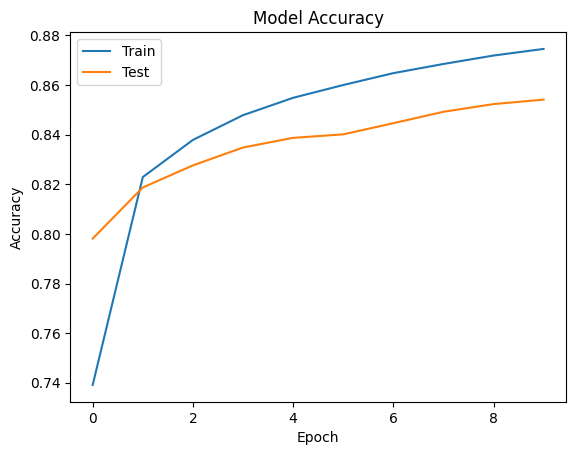

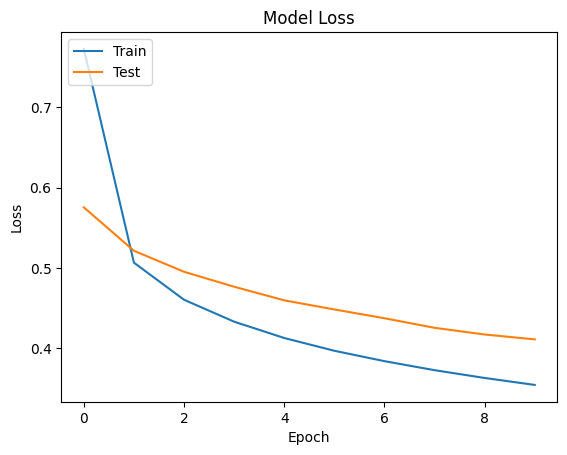

Model 1 Architecture:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,652 (205.68 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical


tf.random.set_seed(1)
np.random.seed(23)

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


model1 = Sequential()
model1.add(Flatten(input_shape=(28, 28)))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model1.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_data=(x_test, y_test), verbose=1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print("Model 1 Architecture:")
model1.summary()

### **Task 1, Model 2: Improved Dense Neural Network**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7290 - loss: 0.7640 - val_accuracy: 0.8307 - val_loss: 0.4560
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8383 - loss: 0.4442 - val_accuracy: 0.8511 - val_loss: 0.4108
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8538 - loss: 0.4024 - val_accuracy: 0.8571 - val_loss: 0.3940
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8623 - loss: 0.3784 - val_accuracy: 0.8594 - val_loss: 0.3866
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8680 - loss: 0.3587 - val_accuracy: 0.8647 - val_loss: 0.3690
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8713 - loss: 0.3489 - val_accuracy: 0.8708 - val_loss: 0.3581
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8753 - loss: 0.3365 - val_accuracy: 0.8668 - val_loss: 0.3573
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8796 - loss: 0.323

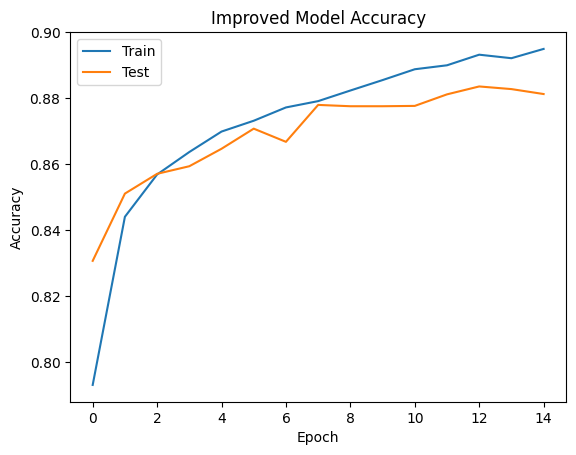

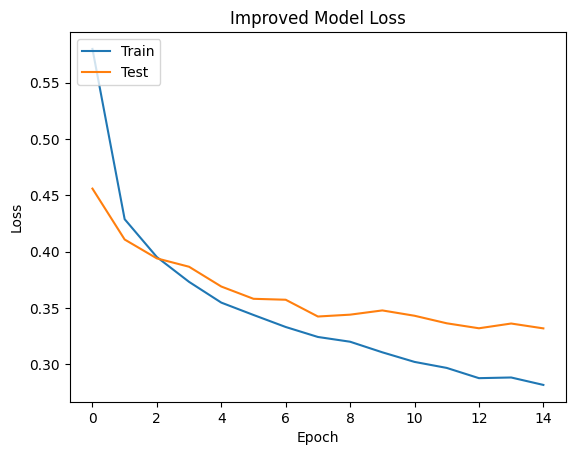

Model 2 Architecture:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)
np.random.seed(23)

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model2.fit(x_train, y_train, epochs=15, batch_size=32,
                    validation_data=(x_test, y_test), verbose=1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Improved Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Improved Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print("Model 2 Architecture:")
model2.summary()

### **Task 2 Model 1: Convolutional Neural Network**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 78s 78ms/step - accuracy: 0.5917 - loss: 1.2711 - val_accuracy: 0.7976 - val_loss: 0.5859
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 83s 79ms/step - accuracy: 0.7999 - loss: 0.5659 - val_accuracy: 0.8129 - val_loss: 0.5160
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - accuracy: 0.8260 - loss: 0.4918 - val_accuracy: 0.8254 - val_loss: 0.4797
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 80s 79ms/step - accuracy: 0.8414 - loss: 0.4500 - val_accuracy: 0.8399 - val_loss: 0.4482
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - accuracy: 0.8509 - loss: 0.4252 - val_accuracy: 0.8430 - val_loss: 0.4352


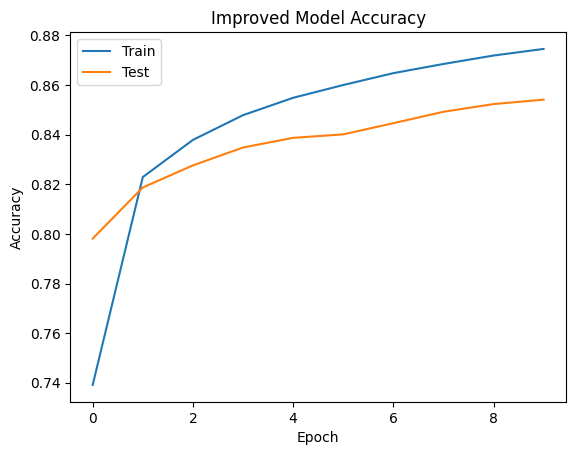

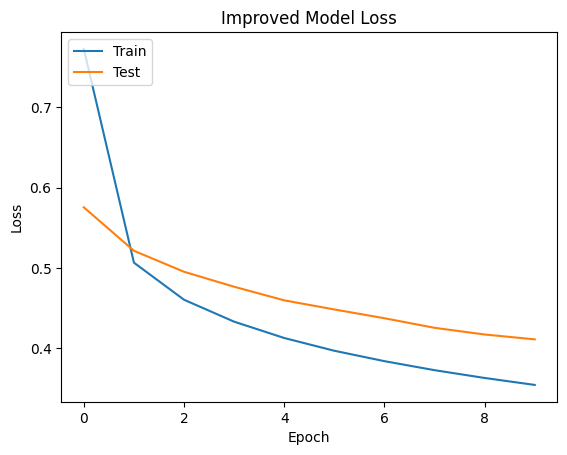

Simple CNN Model Accuracy: 84.30%
Model 3 Architecture:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,434,454 (24.55 MB)

 Trainable params: 3,217,226 (12.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,217,228 (12.27 MB)

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.constraints import MaxNorm  # Corrected import
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)
np.random.seed(1)

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same',
                 activation='relu', kernel_constraint=MaxNorm(3)))
model3.add(MaxPooling2D())
model3.add(Flatten())
model3.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model3.add(Dropout(0.2))
model3.add(Dense(10, activation='softmax'))

lrate = 0.002
epochs = 5
decay = lrate / epochs
sgd = SGD(learning_rate=lrate, momentum=0.7, decay=decay, nesterov=False)

model3.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Improved Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Improved Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

scores = model3.evaluate(x_test, y_test, verbose=0)
print("Simple CNN Model Accuracy: %.2f%%" % (scores[1] * 100))

print("Model 3 Architecture:")
model3.summary()


### **Task 2, Model 2: Deeper Convolutional Neural Network**

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.constraints import MaxNorm  # Corrected import
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)
np.random.seed(1)

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model4 = Sequential()

model4.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model4.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model4.add(MaxPooling2D())

model4.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model4.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model4.add(MaxPooling2D())

model4.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model4.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model4.add(MaxPooling2D())

model4.add(Flatten())

model4.add(Dense(1024, activation='relu', kernel_constraint=MaxNorm(3)))
model4.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model4.add(Dropout(0.2))

model4.add(Dense(10, activation='softmax'))

epochs = 20
lrate = 0.001
decay = lrate / epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=True)

model4.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model4.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=64, verbose=1)

scores = model4.evaluate(x_test, y_test, verbose=0)
print("Deeper CNN Model Accuracy: %.2f%%" % (scores[1] * 100))

print("Model 4 Architecture:")
model4.summary()


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 378s 401ms/step - accuracy: 0.4400 - loss: 1.6921 - val_accuracy: 0.7732 - val_loss: 0.6109
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 375s 393ms/step - accuracy: 0.7920 - loss: 0.5746 - val_accuracy: 0.8206 - val_loss: 0.4938
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 384s 395ms/step - accuracy: 0.8275 - loss: 0.4695 - val_accuracy: 0.8399 - val_loss: 0.4376
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 387s 400ms/step - accuracy: 0.8481 - loss: 0.4155 - val_accuracy: 0.8452 - val_loss: 0.4200
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 377s 395ms/step - accuracy: 0.8604 - loss: 0.3826 - val_accuracy: 0.8565 - val_loss: 0.3923
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 380s 393ms/step - accuracy: 0.8704 - loss: 0.3580 - val_accuracy: 0.8597 - val_loss: 0.3850
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 385s 395ms/step - accuracy: 0.8771 - loss: 0.3377 - val_accuracy: 0.8700 - val_loss: 0.3646
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 400s 415ms/step - accuracy: 0.8816 -

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1024)                │       1,180,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,994,070 (15.24 MB)

 Trainable params: 1,997,034 (7.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,997,036 (7.62 MB)

### **Task 3, Experiment 1 on Task 1: Adam Optimiser**

In [14]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1)

scores = model.evaluate(x_test, y_test, verbose=0)
print("Task 1: Dense Model Accuracy with Adam: %.2f%%" % (scores[1] * 100))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7080 - loss: 0.8166 - val_accuracy: 0.8422 - val_loss: 0.4364
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8298 - loss: 0.4727 - val_accuracy: 0.8435 - val_loss: 0.4262
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8466 - loss: 0.4323 - val_accuracy: 0.8506 - val_loss: 0.4106
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8521 - loss: 0.4074 - val_accuracy: 0.8580 - val_loss: 0.3967
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8569 - loss: 0.3914 - val_accuracy: 0.8669 - val_loss: 0.3708
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8639 - loss: 0.3770 - val_accuracy: 0.8689 - val_loss: 0.3593
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8678 - loss: 0.3665 - val_accuracy: 0.8746 - val_loss: 0.3583
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8695 - loss: 0.35

### **Task 3, Experiment 2 on Task 1: SGD with Lower Learning Rate**

In [15]:
sgd = SGD(learning_rate=0.0005, momentum=0.7)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1)

scores = model.evaluate(x_test, y_test, verbose=0)
print("Task 1: Dense Model Accuracy with SGD (lower LR): %.2f%%" % (scores[1] * 100))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8805 - loss: 0.3224 - val_accuracy: 0.8819 - val_loss: 0.3318
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8853 - loss: 0.3140 - val_accuracy: 0.8818 - val_loss: 0.3288
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8865 - loss: 0.3049 - val_accuracy: 0.8827 - val_loss: 0.3277
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8875 - loss: 0.3057 - val_accuracy: 0.8825 - val_loss: 0.3267
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8894 - loss: 0.3006 - val_accuracy: 0.8827 - val_loss: 0.3263
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8888 - loss: 0.3017 - val_accuracy: 0.8829 - val_loss: 0.3258
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8898 - loss: 0.2990 - val_accuracy: 0.8832 - val_loss: 0.3257
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8896 - loss: 0.2981

### **Task 3, Experiment 1 on Task 2: RMSprop Optimiser**

In [16]:
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64, verbose=1)

scores = model.evaluate(x_test, y_test, verbose=0)
print("Task 2: CNN Model Accuracy with RMSprop: %.2f%%" % (scores[1] * 100))


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8859 - loss: 0.3192 - val_accuracy: 0.8782 - val_loss: 0.3613
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8853 - loss: 0.3233 - val_accuracy: 0.8803 - val_loss: 0.3566
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8853 - loss: 0.3211 - val_accuracy: 0.8759 - val_loss: 0.3772
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8871 - loss: 0.3240 - val_accuracy: 0.8801 - val_loss: 0.3612
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8865 - loss: 0.3239 - val_accuracy: 0.8788 - val_loss: 0.3711
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8890 - loss: 0.3216 - val_accuracy: 0.8797 - val_loss: 0.3730
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8891 - loss: 0.3244 - val_accuracy: 0.8804 - val_loss: 0.3752
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8875 - loss: 0.3259 - val_accuracy: 0.

### **Task 3, Experiment 2 on Task 2: Adam Optimiser with Lower Learning Rate**

In [17]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0005)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64, verbose=1)

scores = model.evaluate(x_test, y_test, verbose=0)
print("Task 2: CNN Model Accuracy with Adam (lower LR): %.2f%%" % (scores[1] * 100))


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8954 - loss: 0.3058 - val_accuracy: 0.8849 - val_loss: 0.3803
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8959 - loss: 0.2917 - val_accuracy: 0.8857 - val_loss: 0.3688
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8995 - loss: 0.2804 - val_accuracy: 0.8897 - val_loss: 0.3686
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8986 - loss: 0.2790 - val_accuracy: 0.8863 - val_loss: 0.3671
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9025 - loss: 0.2728 - val_accuracy: 0.8869 - val_loss: 0.3599
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9031 - loss: 0.2682 - val_accuracy: 0.8904 - val_loss: 0.3611
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9026 - loss: 0.2661 - val_accuracy: 0.8881 - val_loss: 0.3616
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9046 - loss: 0.2575 - val_accuracy: 0.